# Chapter5

In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

# 33. Boolean統計量の計算

In [123]:
movie = pd.read_csv('Pandas-Cookbook-master/data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [124]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: duration, dtype: bool

In [125]:
movie_2_hours.sum()

1039

In [126]:
movie_2_hours.mean()

0.2113506916192026

In [127]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [128]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [129]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [130]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()

0.9777687130328371

# 34. 複数のBoolean条件の構築

- 一般的な論理演算子```and or not```は標準比較演算子（```< > == != <= >=```）よりも優先順位が高い
- pandasの論理演算子（```& | ~```）は標準比較演算子（```< > == != <= >=```）よりも優先順位が上

In [131]:
movie = pd.read_csv('Pandas-Cookbook-master/data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [132]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) | (movie.title_year > 2009))
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [133]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [134]:
 5 > 10 and 3 > 4

False

In [135]:
True and 3 > 4

False

In [136]:
True and False

False

# 35. Booleanインデックス法によるフィルタリング

In [137]:
movie = pd.read_csv('Pandas-Cookbook-master/data/movie.csv', index_col='movie_title')

In [138]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [139]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) & (movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [140]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [141]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [142]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head()

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0


In [143]:
final_crit_a2 = (movie.imdb_score > 8) & \
                (movie.content_rating == 'PG-13') & \
                ((movie.title_year < 2000) | (movie.title_year > 2009))
final_crit_a2.equals(final_crit_a)

True

# 36. インデックス選択によるBooleanインデックス法の代用

In [144]:
college = pd.read_csv('Pandas-Cookbook-master/data/college.csv')

In [145]:
college[college['STABBR'] == 'TX'].head() 

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [146]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [147]:
# Booleanインデックス法の速度
%timeit college[college['STABBR']=='TX']

757 µs ± 6.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [148]:
# インデックス選択法
%timeit college2.loc['TX']

377 µs ± 6.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [149]:
%timeit college2 = college.set_index('STABBR')

907 µs ± 8.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [150]:
# 複数のカラムの選択
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)].filter(like='STABBR').head()

,STABBR
192,CA
193,CA
194,CA
195,CA
196,CA


# レシピ37 重複のないインデックスとソートしたインデックスによる選択

In [151]:
college = pd.read_csv('Pandas-Cookbook-master/data/college.csv')

In [152]:
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [153]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [154]:
%timeit college[college['STABBR'] == 'TX']

785 µs ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [155]:
%timeit college2.loc['TX']

376 µs ± 6.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [156]:
# ソートしたインデックスが一番検索が早い
%timeit college3.loc['TX']

55.9 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [157]:
# 校名をインデックスにし、重複がないか確認
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [158]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [159]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [160]:
%timeit college[college['INSTNM'] == 'Stanford University']

671 µs ± 9.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [161]:
%timeit college_unique.loc['Stanford University']

115 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [162]:
# インデックスを複数列（都市と州）の組み合わせにする
college.index = college['CITY'] + ', '  + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [163]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [164]:
%%timeit
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

1.26 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [165]:
%timeit college.loc['Miami, FL']

56.6 µs ± 609 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# レシピ38 株価見直しの計算

In [166]:
slb = pd.read_csv('Pandas-Cookbook-master/data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [167]:
# 終値の要約統計量
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [168]:
# 最高、最低の10パーセントタイル内の終値を選ぶ
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

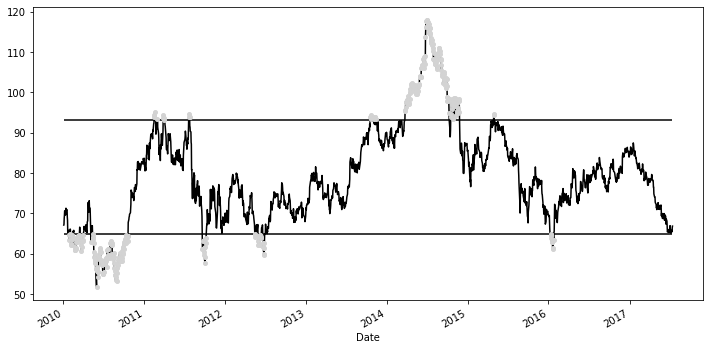

In [169]:
slb_close.plot(color='black', figsize=(12, 6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='black')

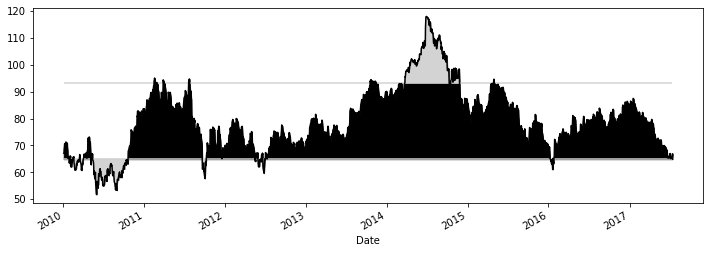

In [170]:
slb_close.plot(color='black', figsize=(12, 4))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10, y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index, y1=lower_10, y2=slb_close.values, where=slb_close < lower_10, color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10, y2=slb_close.values, where=slb_close > upper_10, color='lightgray')

In [104]:
# レシピ39 SQLのWHERE節の翻訳

In [171]:
employee = pd.read_csv('Pandas-Cookbook-master/data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [172]:
employee.columns

Index(['UNIQUE_ID', 'POSITION_TITLE', 'DEPARTMENT', 'BASE_SALARY', 'RACE',
       'EMPLOYMENT_TYPE', 'GENDER', 'EMPLOYMENT_STATUS', 'HIRE_DATE',
       'JOB_DATE'],
      dtype='object')

In [173]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [183]:
# フィルタリング基準ごとに1つの文を書く
depts = ['Houston Police Department-HPD', 
             'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & \
               (employee.BASE_SALARY <= 120000)

In [184]:
# すべてのBoolean indexを組み合わせる
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [189]:
# 作成したBoolean値でフィルタリング
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [190]:
# 給与基準
criteria_sal = employee.BASE_SALARY.between(8000, 12000)

In [197]:
# 人数の多い上位5部門を除く
top_5_depts = employee.DEPARTMENT.value_counts()
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


# レシピ40 株式収益率の正規度判定

In [205]:
# 正規分布に従わないデータを扱ってみる
# amazonの株価
amzn = pd.read_csv('Pandas-Cookbook-master/data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [206]:
# 前日との終値の差（%）
amzn_daily_return = amzn.Close.pct_change()
# 欠損値削除
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.head()

Date
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
Name: Close, dtype: float64

<AxesSubplot:>

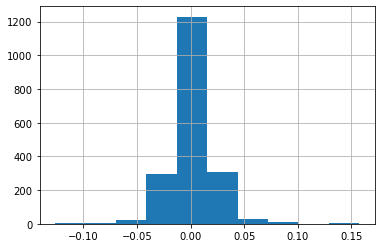

In [210]:
amzn_daily_return.hist()

In [211]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()
mean, std

(0.0012631309530525448, 0.019861559267099153)

In [213]:
# 日時収益率
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)